# 標本の統計量の性質

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3

%matplotlib inline

In [2]:
# 平均4、標準偏差0.8の正規分布
population = stats.norm(loc = 4, scale = 0.8)

## 標本平均を何度も計算してみる

In [4]:
# 試行回数10000回 = 標本平均が10000個獲得
sample_mean_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10) # 標本抽出
    sample_mean_array[i] = sp.mean(sample) #得られた標本の平均値を格納

In [5]:
sample_mean_array

array([ 3.922,  3.864,  4.07 , ...,  4.136,  4.575,  4.099])

## 標本平均の平均値は、母平均に近い

In [7]:
sp.mean(sample_mean_array)

4.004

In [8]:
sp.std(sample_mean_array, ddof = 1)

0.251

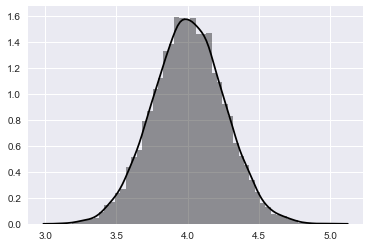

In [9]:
# 標本平均のヒストグラム
sns.distplot(sample_mean_array, color='black')

## サンプルサイズ大なら、標本平均は母平均に近い
サンプルサイズが大きくなると、標本平均は母平均に近づいていく

In [10]:
size_array = np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [11]:
sample_mean_array_size = np.zeros(len(size_array))

In [12]:
# 標本平均を求める試行を、サンプルサイズを変えながら実行
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

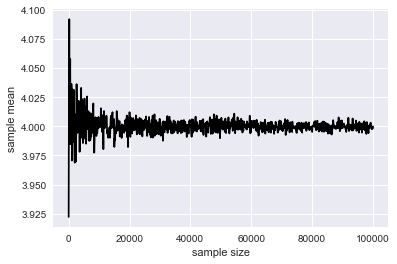

In [13]:
# サンプルサイズが大きいほど母平均(4)に近づく
plt.plot(size_array, sample_mean_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

## 標本平均を何度も計算する関数を作る
calc_sample_mean()関数と命名

In [14]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [16]:
# データを10個選んで標本平均を得る試行を10000回繰り返す
np.random.seed(1)
sp.mean(calc_sample_mean(size=10, n_trial=10000))

4.004

## サンプルサイズを変えたときの標本平均の分布
サンプルサイズを10、20、30と変化させていったときの標本平均の分布をバイオリンプロットで確認

In [19]:
np.random.seed(1)
# サンプルサイズ10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    "sample_mean" : size_10,
    "size"                  : np.tile("size 10", 10000)
})
# サンプルサイズ20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    "sample_mean" : size_20,
    "size"                  : np.tile("size 20", 10000)
})
# サンプルサイズ30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean" : size_30,
    "size"                  : np.tile("size 30", 10000)
})
# 結合
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])
# 結果の表示
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


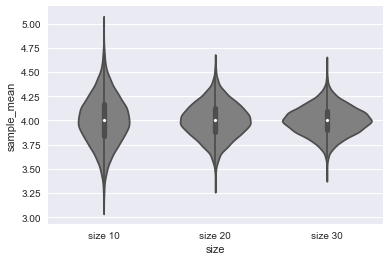

In [20]:
# サンプルサイズが大きくなると標本平均のばらつきが小さくなり、母平均(4)に集中
sns.violinplot(x = "size", y = "sample_mean", data = sim_result, color='gray')

## 標本平均の標準偏差は墓標準偏差よりも小さい

In [21]:
size_array = np.arange(start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [22]:
sample_mean_std_array = np.zeros(len(size_array))

In [23]:
# シミュレーション
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof =1)

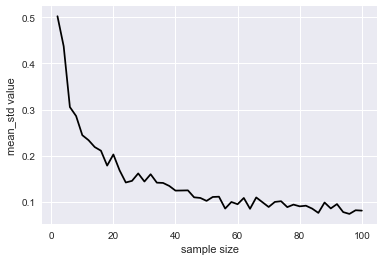

In [24]:
# サンプルサイズが増えると標本平均の標準偏差が小さくなる
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

## 標準誤差
Standard Error(SE)

In [25]:
# 標準誤差のシミュレーション
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([ 0.566,  0.4  ,  0.327,  0.283,  0.253,  0.231,  0.214,  0.2  ,
        0.189,  0.179,  0.171,  0.163,  0.157,  0.151,  0.146,  0.141,
        0.137,  0.133,  0.13 ,  0.126,  0.123,  0.121,  0.118,  0.115,
        0.113,  0.111,  0.109,  0.107,  0.105,  0.103,  0.102,  0.1  ,
        0.098,  0.097,  0.096,  0.094,  0.093,  0.092,  0.091,  0.089,
        0.088,  0.087,  0.086,  0.085,  0.084,  0.083,  0.083,  0.082,
        0.081,  0.08 ])

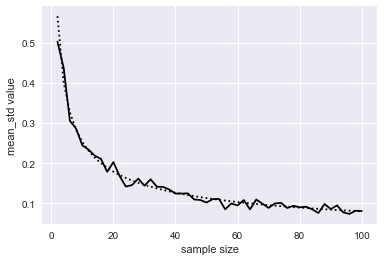

In [26]:
# 標準偏差と標準誤差のシミュレーション結果
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

## 標本分散の平均値は、母分散からずれている
標本分散を対象としたシミュレーション

In [27]:
# 標本分散を格納する入れ物
sample_var_array = np.zeros(10000)

In [28]:
# シミュレーション
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = sp.var(sample, ddof=0)

In [29]:
# 標本分散の平均値
# 母分散は0.64なので過小評価されている
sp.mean(sample_var_array)

0.575

## 不偏分散を使うと、バイアスがなくなる

In [30]:
# 不偏分散を格納する入れ物
unbias_var_array = np.zeros(10000)
# シミュレーション
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = sp.var(sample, ddof=1)
# 標本分散の平均値
# 母分散は0.64なので過小評価されている
sp.mean(unbias_var_array)

0.639

## サンプルサイズ大なら、不偏分散は母分散に近い

In [31]:
# サンプルサイズ
size_array = np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [32]:
# 不偏分散を格納する入れ物
unbias_var_array_size = np.zeros(len(size_array))

In [33]:
# シミュレーション
# サンプルサイズを変え、不偏分散を求める
np.random.seed(1)
for i in  range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof=1)

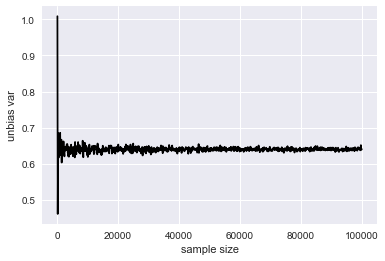

In [35]:
# サンプルサイズが大きくなればなるほど不偏分散は母分散(0.64)に近づく
plt.plot(size_array, unbias_var_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("unbias var")